# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [2]:
house = ds.loc[ds['price'].idxmax()]
address = house.address
price = house.price
print(f'The house with address {address} is the most expensive and its price is {price} USD')

The house with address El Escorial is the most expensive and its price is 8500000 USD


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [30]:
house = ds.loc[ds['price'].idxmin()]
address = house.address
price = house.price
print(f'The house with address {address} is the cheapest and its price is {price} USD')

print('Since the price of the house is 0, we can assume that this information is untrue. Thus, we will apply a filter to find the cheapest house that actually costs money')

filtered_ds = ds[ds['price'] > 0]
house_above_0 = filtered_ds.loc[filtered_ds['price'].idxmin()]
address_above_0 = house_above_0.address
price_above_0 = house_above_0.price

print(f'Once filtered the house with address {address_above_0} is the cheapest, and its price is {price_above_0} USD')


The house with address Parla is the cheapest and its price is 0 USD
Since the price of the house is 0, we can assume that this information is untrue. Thus, we will apply a filter to find the cheapest house that actually costs money
Once filtered the house with address Berlin, Coslada is the cheapest, and its price is 600 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [4]:
biggest_house = ds.loc[ds['surface'].idxmax()]
biggest_house_address = biggest_house.address
biggest_house_surface = biggest_house.surface
print(f'The house with address {biggest_house_address} is the biggest and its surface is {biggest_house_surface} meters')

smallest_house = ds.loc[ds['surface'].idxmin()]
smallest_house_address = smallest_house.address
smallest_house_surface = smallest_house.surface
print(f'The house with address {smallest_house_address} is the smallest and its surface is {smallest_house_surface} meters')

The house with address Sevilla la Nueva is the biggest and its surface is 249000.0 meters
The house with address Calle Amparo,  Madrid Capital is the smallest and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [5]:
filtered_ds = ds.dropna(subset=['level5'])
#print(filtered_ds)

unique_population = filtered_ds['level5'].unique()
#print(unique_population)

for population in unique_population:
    print(population + ',')

Arganda del Rey,
Fuenlabrada,
Boadilla del Monte,
Las Rozas de Madrid,
 Madrid Capital,
Villaviciosa de Odón,
Pinto,
Valdemoro,
Navalcarnero,
Pozuelo de Alarcón,
Torrejón de Ardoz,
Navalagamella,
San Sebastián de los Reyes,
Rivas-vaciamadrid,
Alpedrete,
Móstoles,
San Fernando de Henares,
Coslada,
Becerril de la Sierra,
Alcalá de Henares,
Chinchón,
Parla,
Alcorcón,
El Escorial,
Leganés,
Pedrezuela,
Majadahonda,
Villanueva de la Cañada,
Villanueva del Pardillo,
Torrelodones,
Moralzarzal,
Mejorada del Campo,
Aranjuez,
Corpa,
Getafe,
Velilla de San Antonio,
Sevilla la Nueva,
San Martín de la Vega,
Villalbilla,
Collado Villalba,
Alcobendas,
El Molar (Madrid),
Moraleja de Enmedio,
Algete,
Campo Real,
Torrejón de la Calzada,
Colmenar Viejo,
Valdemorillo,
Fuente El Saz de Jarama,
Tres Cantos,
Arroyomolinos (Madrid),
Griñón,
Paracuellos de Jarama,
Guadarrama,
Titulcia,
Galapagar,
Collado Mediano,
Los Molinos,
San Lorenzo de El Escorial,
Loeches,
San Martín de Valdeiglesias,
Navas del Rey,
Busta

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [26]:
result = ds.isna().any().any()
print(result)

rows_with_na = ds[ds.isna().any(axis=1)]
print("Rows with NAs:")
print(rows_with_na)

columns_with_na = ds.columns[ds.isna().any()].tolist()
print("Columns with NAs:")
print(columns_with_na)

True
Rows with NAs:
       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEstate        

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [27]:
clean_ds = ds.dropna(axis=1)

print (ds, clean_ds)

       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEstate                            

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [8]:
arroyomolinos_data = ds[ds['level5'] == 'Arroyomolinos (Madrid)']

mean_price = arroyomolinos_data['price'].mean()

print('The mean price in Arroyomolinos (Madrid) is ' + str(mean_price) + 'USD')

The mean price in Arroyomolinos (Madrid) is 294541.59854014596USD


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

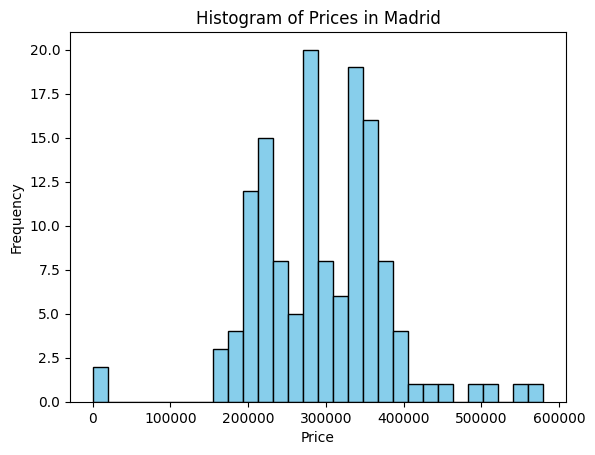

In [9]:
import matplotlib.pyplot as plt

plt.hist(arroyomolinos_data['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices in Madrid')
plt.show()

One can observe that the vast majority of prices range between 160000 and 410000 USD (the most common price being 270000USD), and a few prices are ranged above, topping at 580000USD. There doesn't seem to be any prices below 160000USD, with the exception of a few prices at 30000USD (those are probably outliers)

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [10]:
valdemorillo_data = ds[ds['level5'] == 'Valdemorillo']
mean_price_valdemorillo = valdemorillo_data['price'].mean()
print('Mean price in Valdemorillo is ' + str(mean_price_valdemorillo) + 'USD')

galapagar_data = ds[ds['level5'] == 'Galapagar']
mean_price_galapagar = galapagar_data['price'].mean()
print('Mean price in Galapagar is ' + str(mean_price_galapagar) + 'USD')

print ('The difference between both mean prices is ' + str(mean_price_valdemorillo - mean_price_galapagar) + 'USD.')

Mean price in Valdemorillo is 363860.2931034483USD
Mean price in Galapagar is 360063.20238095237USD
The difference between both mean prices is 3797.090722495923USD.


The difference between both mean prices is 3797.090722495923USD. Considering how wide the range of the average price is, I would argue that de difference is too small to be statistically significant, though I would have to calculate the R to be completely sure

#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [11]:
valdemorillo_data['pps'] = valdemorillo_data['price'] / valdemorillo_data['surface']
mean_pps_valdemorillo = valdemorillo_data['pps'].mean()
print('The mean prince per m2 in Valdemorillo is ' + str(mean_pps_valdemorillo) + 'USD')

galapagar_data['pps'] = galapagar_data['price'] / galapagar_data['surface']
mean_pps_galapagar = galapagar_data['pps'].mean()
print('The mean price per m2 in Galapagar is ' + str(mean_pps_galapagar) + 'USD')

print('The difference between the prices per square meter in Galapagar and Valdemorillo is ' + str(mean_pps_galapagar - mean_pps_valdemorillo) + 'USD. From this we can conclude that Valdemorillo is a slightly cheaper area to buy property in, which might make it more appealing to families with lower income.')

The mean prince per m2 in Valdemorillo is 1317.9502109024986USD
The mean price per m2 in Galapagar is 1606.3240303094024USD
The difference between the prices per square meter in Galapagar and Valdemorillo is 288.37381940690375USD. From this we can conclude that Valdemorillo is a slightly cheaper area to buy property in, which might make it more appealing to families with lower income.


/tmp/ipykernel_597/2997879615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valdemorillo_data['pps'] = valdemorillo_data['price'] / valdemorillo_data['surface']
/tmp/ipykernel_597/2997879615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galapagar_data['pps'] = galapagar_data['price'] / galapagar_data['surface']


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

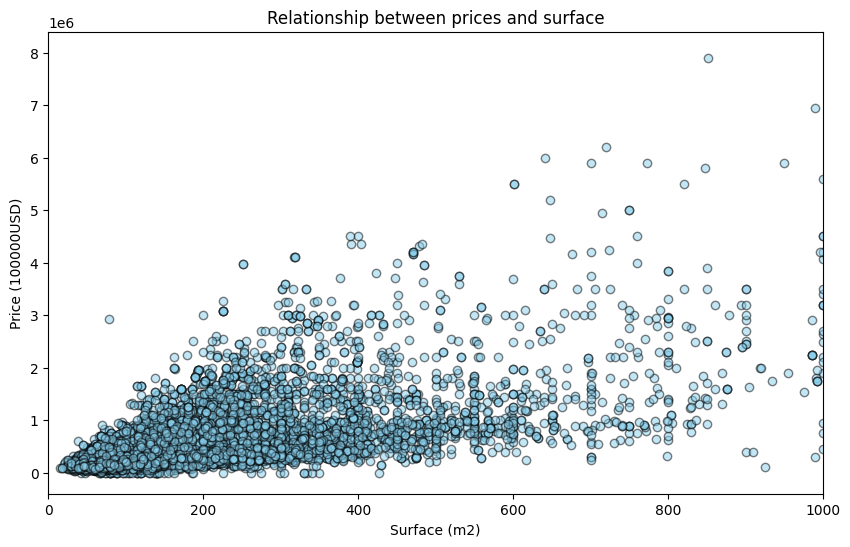

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(ds['surface'], ds['price'], alpha=0.5, color='skyblue', edgecolors='k')
plt.xlabel('Surface (m2)')
plt.ylabel('Price (100000USD)')
plt.title('Relationship between prices and surface')

plt.xlim(0, 1000)
plt.show()

Because of some outlier values, it was hard to visualize any realtionship between prices and surface. To solve this, we capped the surface at 1000m2. Doing this, we can observe that the relationship is incremental.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [13]:
agencies_count = ds['realEstate_name'].nunique()
print(agencies_count)

1821


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [14]:
population_count = ds['level5'].value_counts()
# print(population_count)

most_houses_population = population_count.idxmax()
most_houses_count = population_count.max()
print('The population with the most houses is' + most_houses_population + ', with ' + str(most_houses_count) + ' houses.')

The population with the most houses is Madrid Capital, with 6643 houses.


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [15]:
south_belt_madrid_ds = ds[ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]
print(south_belt_madrid_ds)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

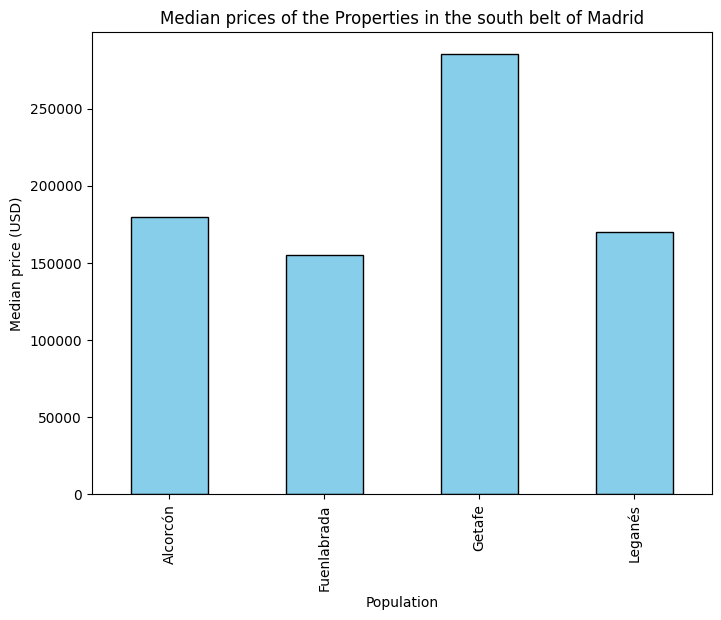

In [16]:
median_prices = south_belt_madrid_ds.groupby('level5')['price'].median()

plt.figure(figsize=(8, 6))
median_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Population')
plt.ylabel('Median price (USD)')
plt.title('Median prices of the Properties in the south belt of Madrid')
plt.show()

While the prices of Alcorcón, Fuenlabrada and Leganés are all similar (ranging from 160000 to 18000 USD), Getafe is signifcantly more expensive than the others, with a mean price of 290000 USD.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [17]:
sample_mean = south_belt_madrid_ds[['price', 'rooms', 'surface', 'bathrooms']].mean()
sample_variance = south_belt_madrid_ds[['price', 'rooms', 'surface', 'bathrooms']].var(ddof=1)

print('Sample mean: \n' + sample_mean.to_string())
print('Sample variance: \n' + sample_variance.to_string())

Sample mean: 
price        223094.480706
rooms             3.017738
surface         111.752224
bathrooms         1.633222
Sample variance: 
price        1.492137e+10
rooms        7.188859e-01
surface      4.263052e+03
bathrooms    5.717969e-01


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [18]:
most_expensive = south_belt_madrid_ds.loc[south_belt_madrid_ds.groupby('level5')['price'].idxmax()]

print('The most expensive houses are: \n' + most_expensive.to_string())

The most expensive houses are: 
       Unnamed: 0  id_realEstates  isNew                          realEstate_name  phone_realEstate                                                                                                                                                          url_inmueble  rooms  bathrooms  surface    price                  date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

/tmp/ipykernel_597/3508715229.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  south_belt_madrid_ds['normalized_price'] = south_belt_madrid_ds.groupby('level5').apply(normalize_prices).reset_index(drop=True)
/tmp/ipykernel_597/3508715229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_madrid_ds['normalized_price'] = south_belt_madrid_ds.groupby('level5').apply(normalize_prices).reset_index(drop=True)


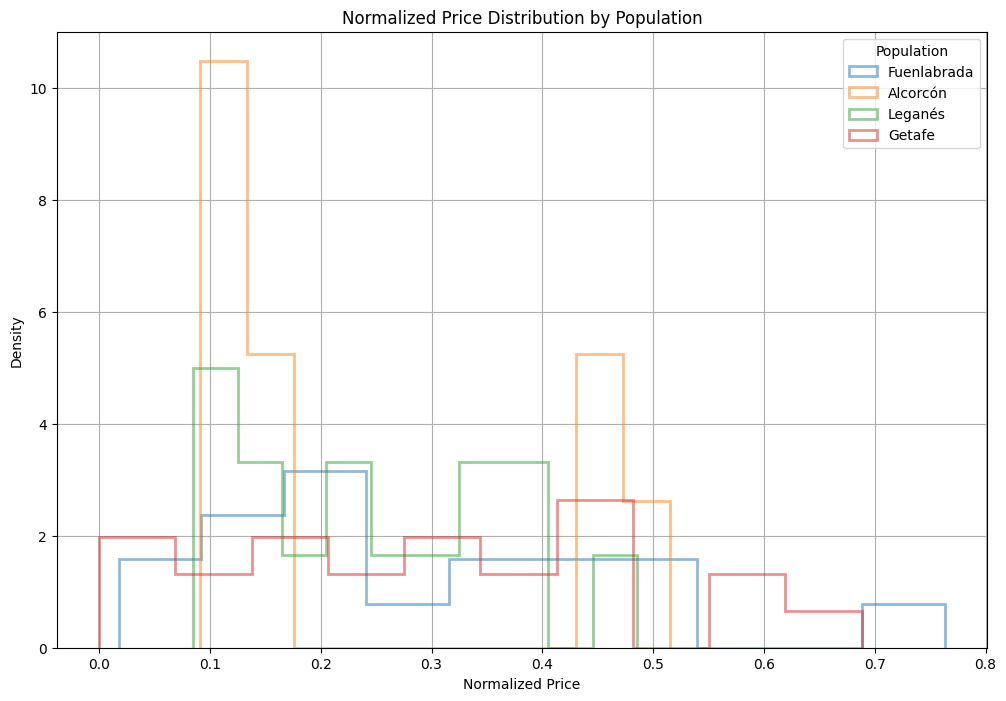

In [32]:
def normalize_prices(df):
    return (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())

south_belt_madrid_ds['normalized_price'] = south_belt_madrid_ds.groupby('level5').apply(normalize_prices).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 8))

# Use a density line plot for each level to avoid overlapping
for level in south_belt_madrid_ds['level5'].unique():
    subset = south_belt_madrid_ds[south_belt_madrid_ds['level5'] == level]
    plt.hist(
        subset['normalized_price'], bins=10, alpha=0.5, label=level, 
        density=True, histtype='step', linewidth=2
    )

plt.title('Normalized Price Distribution by Population')
plt.xlabel('Normalized Price')
plt.ylabel('Density')
plt.legend(title='Population')
plt.grid(True)
plt.show()

The normalized prices in Getafe seem to be concentrated between 0.1 and 0.2, and 0.4 and 0.5, while the rest of the places seem to be more spread. This indicates that the majority of buildings in Getafe have a similar price, while the prices of the other neighbourhoods are more varied. 

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

/tmp/ipykernel_597/3694034292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_madrid_ds.loc[south_belt_madrid_ds['level5'].isin(['Getafe', 'Alcorcón']), 'pps'] = \


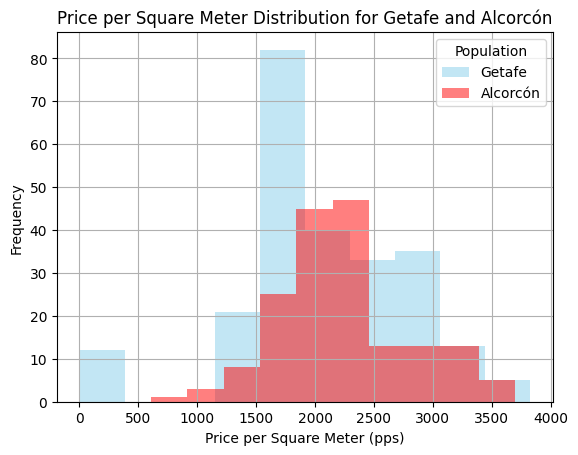

The price per square meter in Getafe seems to be more homogenous (most of the houses range from 1500 to 1800), while it seems to follow a more normal distribution in Alcorcón.


In [ ]:
filtered_df = south_belt_madrid_ds[south_belt_madrid_ds['level5'].isin(['Getafe', 'Alcorcón'])]

south_belt_madrid_ds.loc[south_belt_madrid_ds['level5'].isin(['Getafe', 'Alcorcón']), 'pps'] = \
    filtered_df['price'] / filtered_df['surface']

getafe_pps = south_belt_madrid_ds[south_belt_madrid_ds['level5'] == 'Getafe']['pps']
plt.hist(getafe_pps, bins=10, alpha=0.5, label='Getafe', color='skyblue')

alcorcon_pps = south_belt_madrid_ds[south_belt_madrid_ds['level5'] == 'Alcorcón']['pps']
plt.hist(alcorcon_pps, bins=10, alpha=0.5, label='Alcorcón', color='red')

plt.title('Price per Square Meter Distribution for Getafe and Alcorcón')
plt.xlabel('Price per Square Meter (pps)')
plt.ylabel('Frequency')
plt.legend(title='Population')
plt.grid(True)
plt.show()

print('The price per square meter in Getafe seems to be more homogenous (most of the houses range from 1500 to 1800), while it seems to follow a more normal distribution in Alcorcón.')


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

/tmp/ipykernel_597/2906744744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_madrid_ds['pps'] = south_belt_madrid_ds['price'] / south_belt_madrid_ds['surface']


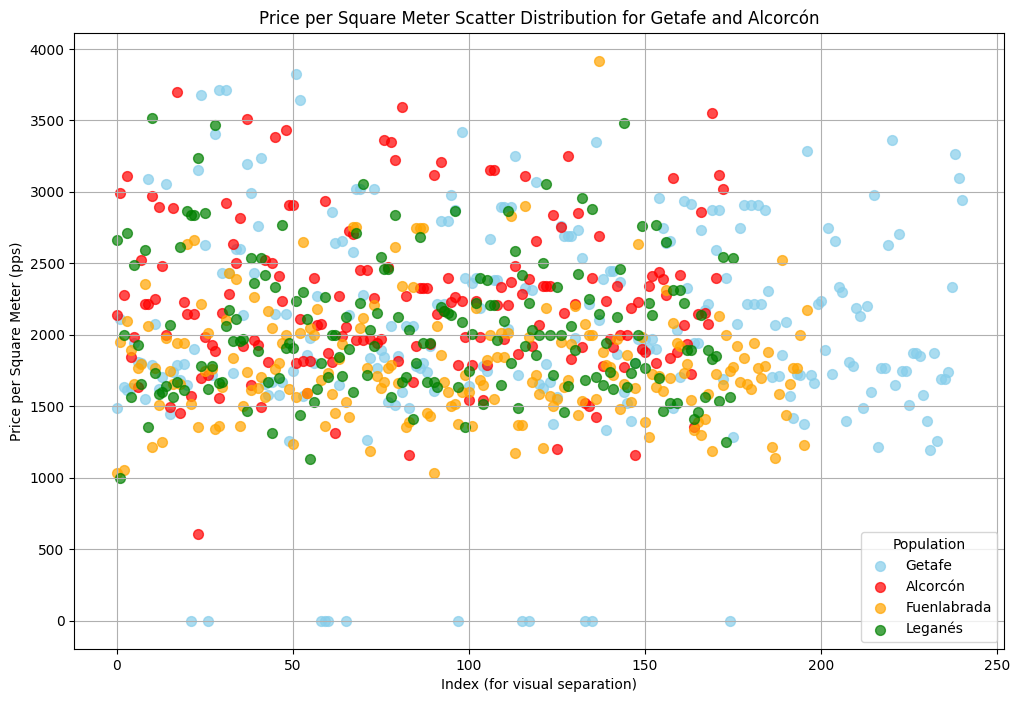

In [54]:
south_belt_madrid_ds['pps'] = south_belt_madrid_ds['price'] / south_belt_madrid_ds['surface']

getafe_pps = south_belt_madrid_ds[south_belt_madrid_ds['level5'] == 'Getafe']['pps'].dropna()
alcorcon_pps = south_belt_madrid_ds[south_belt_madrid_ds['level5'] == 'Alcorcón']['pps'].dropna()
fuenlabrada_pps = south_belt_madrid_ds[south_belt_madrid_ds['level5'] == 'Fuenlabrada']['pps'].dropna()
leganes_pps = south_belt_madrid_ds[south_belt_madrid_ds['level5'] == 'Leganés']['pps'].dropna()

plt.figure(figsize=(12, 8))

plt.scatter(range(len(getafe_pps)), getafe_pps, alpha=0.7, label='Getafe', color='skyblue', s=50)
plt.scatter(range(len(alcorcon_pps)), alcorcon_pps, alpha=0.7, label='Alcorcón', color='red', s=50)
plt.scatter(range(len(fuenlabrada_pps)), fuenlabrada_pps, alpha=0.7, label='Fuenlabrada', color='orange', s=50)
plt.scatter(range(len(leganes_pps)), leganes_pps, alpha=0.7, label='Leganés', color='green', s=50)

plt.title('Price per Square Meter Scatter Distribution for Getafe and Alcorcón')
plt.xlabel('Index (for visual separation)')
plt.ylabel('Price per Square Meter (pps)')
plt.legend(title='Population')
plt.grid(True)
plt.show()

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [51]:
from ipyleaflet import Map, basemaps

map = Map(center = (40.29, -3.65), zoom = 12, min_zoom = 1, max_zoom = 20,
    basemap=basemaps.OpenTopoMap)
map


Map(center=[40.29, -3.65], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [50]:
from ipyleaflet import Marker, AwesomeIcon

coordinates = south_belt_madrid_ds.set_index('Unnamed: 0')[['latitude', 'longitude', 'level5']].to_dict(orient='index')

colors = {
    'Alcorcón': 'red',
    'Getafe': 'blue',
    'Fuenlabrada': 'orange',
    'Leganés': 'green'
}

for num, values in coordinates.items():
    latitude = float(values['latitude'].replace(',', '.'))
    longitude = float(values['longitude'].replace(',', '.'))
    level5 = values['level5']
    icon = AwesomeIcon(name='home',  marker_color=colors.get(level5, 'blue'))

    marker = Marker(location = (latitude, longitude), icon = icon)

    map.add_layer(marker)

map




Map(bottom=396064.0, center=[40.29, -3.65], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_i…